pip install pytrends matplotlib seaborn plotly pandas 

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

## Setup Pytrend library and Defining Keyword

In [7]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = 'data science'

## Data Request           
Data is requested from 'GOOGLE'

In [8]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo = '', gprop ='')

## Country wise Interest 

In [13]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword, ascending = False).head(15)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20576\1740690229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index, palette='Blues_d')


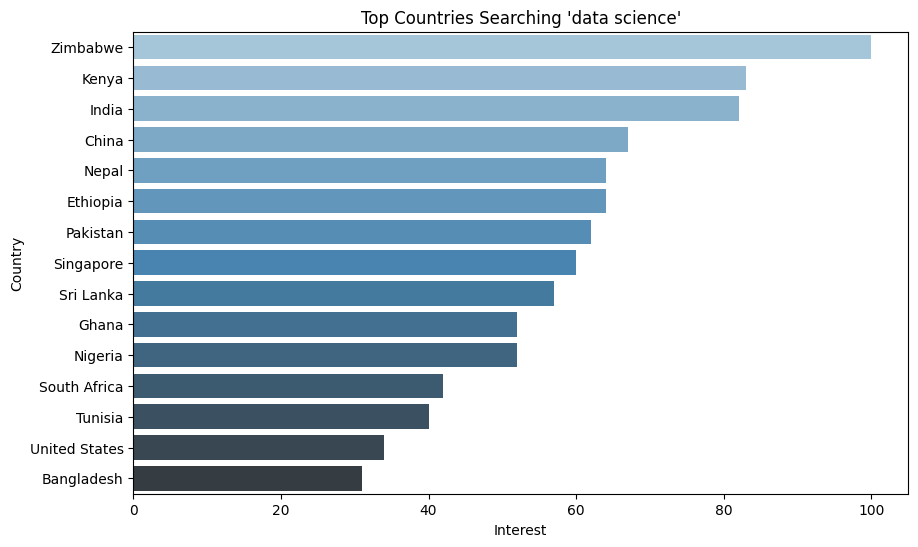

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data[keyword],y=region_data.index, palette='Blues_d')
plt.title(f"Top Countries Searching '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

## World Map Representation 

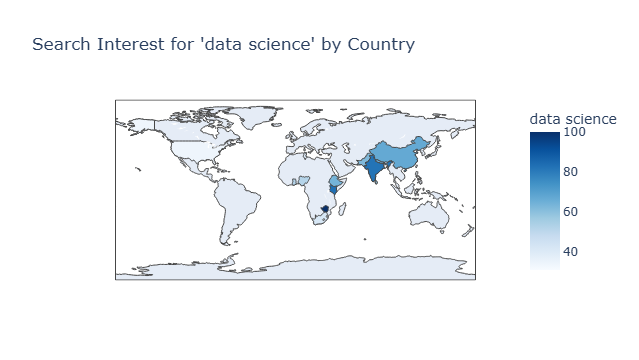

In [17]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

## Time wise interest

In [18]:
time_df = pytrends.interest_over_time()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



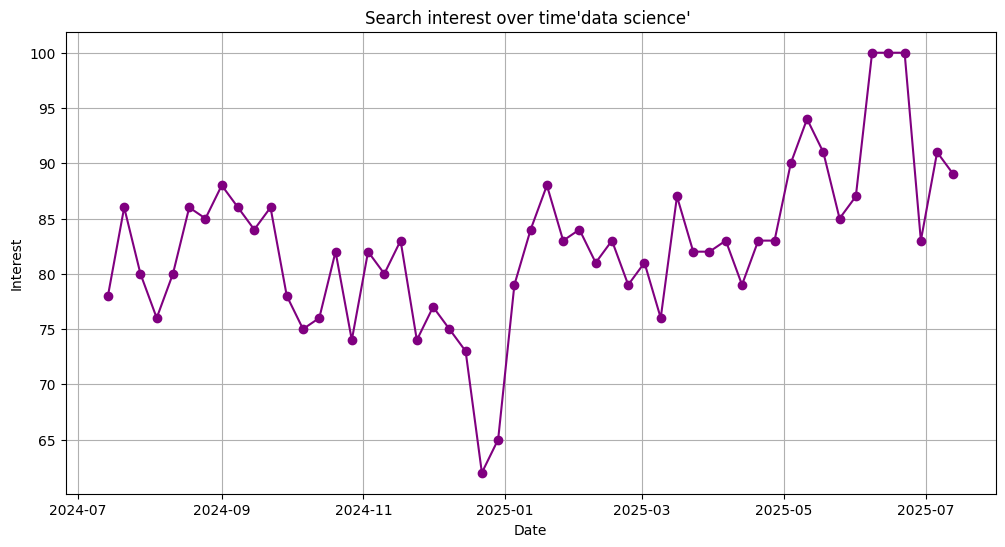

In [23]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker ='o', color = 'purple')
plt.title(f"Search interest over time'{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

## Multiple keyword comparison

In [24]:
kw_list = ['data science', 'cloud computing', 'machine learning', 'artificial intelligence']
pytrends.build_payload(kw_list, cat= 0, timeframe = 'today 12-m', geo ='', gprop='')

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



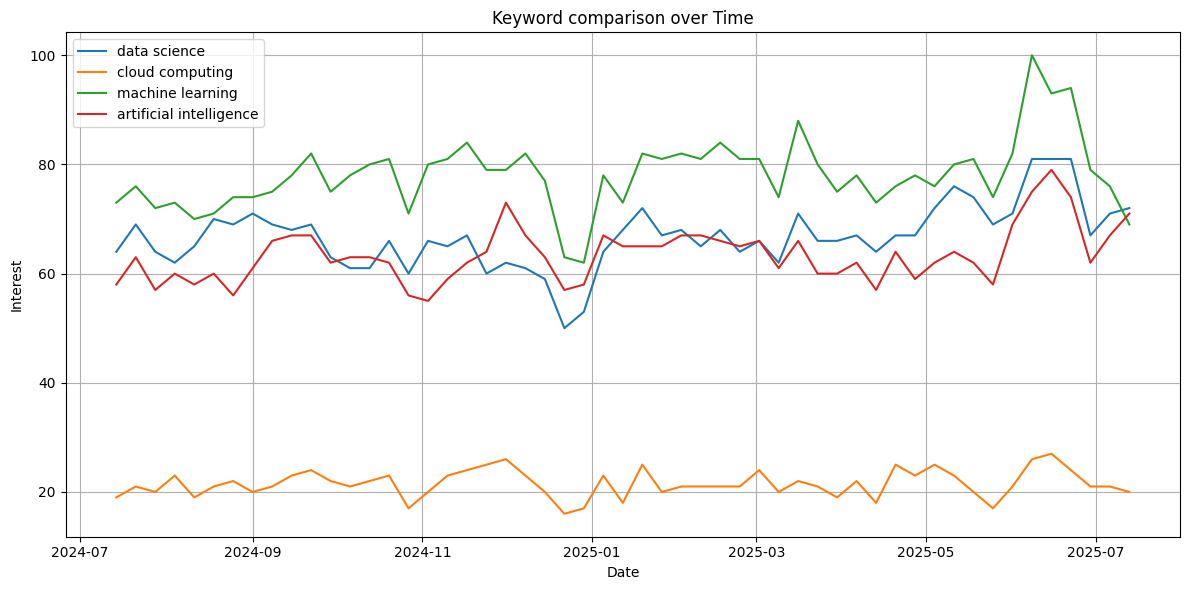

In [26]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword comparison over Time")
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()